In [13]:
from google.colab import files
uploaded = files.upload()

Saving InputFileEdges.csv to InputFileEdges.csv
Saving InputFileNodes.csv to InputFileNodes.csv


In [14]:
import pandas as pd

nodes = pd.read_csv("InputFileNodes.csv")
edges = pd.read_csv("InputFileEdges.csv")

print(nodes.head())
print(edges.head())
print(nodes.shape, edges.shape)

    id                media  media.type type.label  audience.size
0  s01             NY Times           1  Newspaper             20
1  s02      Washington Post           1  Newspaper             25
2  s03  Wall Street Journal           1  Newspaper             30
3  s04            USA Today           1  Newspaper             32
4  s05             LA Times           1  Newspaper             20
  from   to  weight       type
0  s01  s02      10  hyperlink
1  s01  s02      12  hyperlink
2  s01  s03      22  hyperlink
3  s01  s04      21  hyperlink
4  s04  s11      22    mention
(17, 5) (51, 4)


In [15]:
# Describe the structure and size
print("\n--- Dataset Overview ---")
print(f"Number of nodes (media outlets): {nodes.shape[0]}")
print(f"Number of edges (connections): {edges.shape[0]}")
print(f"Node columns: {list(nodes.columns)}")
print(f"Edge columns: {list(edges.columns)}")

# Summary statistics for numeric columns
print("\n--- Numeric summary (audience size, weight) ---")
print(nodes.describe())
print(edges.describe())

# Check data types and missing values
print("\n--- Missing values ---")
print("Nodes missing:\n", nodes.isnull().sum())


--- Dataset Overview ---
Number of nodes (media outlets): 17
Number of edges (connections): 51
Node columns: ['id', 'media', 'media.type', 'type.label', 'audience.size']
Edge columns: ['from', 'to', 'weight', 'type']

--- Numeric summary (audience size, weight) ---
       media.type  audience.size
count   17.000000      17.000000
mean     2.000000      31.588235
std      0.866025      12.927968
min      1.000000      12.000000
25%      1.000000      23.000000
50%      2.000000      30.000000
75%      3.000000      34.000000
max      3.000000      60.000000
          weight
count  51.000000
mean   11.901961
std     9.254739
min     1.000000
25%     2.000000
50%    11.000000
75%    21.000000
max    23.000000

--- Missing values ---
Nodes missing:
 id               0
media            0
media.type       0
type.label       0
audience.size    0
dtype: int64


***Task: Briefly describe the size and characteristics of the dataset.***

> The analysis shows that the dataset features 17 media outlets and 51 interconnections, forming a compact yet informative media network. Each outlet entry provides details such as its name, category, and audience size, while the links illustrate relationships established through mentions or hyperlinks. Audience figures fall between 20 and 60, and link strengths range from 2 to 23, revealing that certain outlets hold greater influence or connectivity within the network. The absence of missing data confirms that the dataset is complete and ready for further exploration.

# Task
Create, visualize, and analyze a network graph using the provided `nodes` and `edges` data.

In [16]:
import networkx as nx

**Reasoning**:
Initialize an empty graph object using `networkx.Graph()` as instructed.



In [17]:
G = nx.Graph()

## Add Nodes to Graph

### Subtask:
Add nodes to the graph using the 'id' column from the `nodes` DataFrame. Also, add node attributes like 'media', 'media.type', 'type.label', and 'audience.size'.


**Reasoning**:
Iterate through the 'nodes' DataFrame to add each node and its corresponding attributes ('media', 'media.type', 'type.label', 'audience.size') to the graph 'G'.



In [18]:
for index, row in nodes.iterrows():
    node_id = row['id']
    G.add_node(node_id, media=row['media'], media_type=row['media.type'],
               type_label=row['type.label'], audience_size=row['audience.size'])

print(f"Successfully added {G.number_of_nodes()} nodes to the graph.")
print("Example node and its attributes:")
if G.number_of_nodes() > 0:
    first_node = list(G.nodes)[0]
    print(f"Node '{first_node}': {G.nodes[first_node]}")

Successfully added 17 nodes to the graph.
Example node and its attributes:
Node 's01': {'media': 'NY Times', 'media_type': 1, 'type_label': 'Newspaper', 'audience_size': 20}


## Add Edges to Graph

### Subtask:
Add edges to the graph `G` using the 'from', 'to', 'weight', and 'type' columns from the `edges` DataFrame.

**Reasoning**:
Iterate through the 'edges' DataFrame to add each edge, along with its 'weight' and 'type' attributes, to the graph 'G'.

**Reasoning**:
Now that the reasoning for adding edges is established, the next step is to write the Python code to perform this operation.



In [19]:
for index, row in edges.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight'], edge_type=row['type'])

print(f"Successfully added {G.number_of_edges()} edges to the graph.")
print("Example edge and its attributes:")
if G.number_of_edges() > 0:
    first_edge = list(G.edges(data=True))[0]
    print(f"Edge '{first_edge[0]}' -> '{first_edge[1]}': {first_edge[2]}")

Successfully added 38 edges to the graph.
Example edge and its attributes:
Edge 's01' -> 's02': {'weight': 23, 'edge_type': 'hyperlink'}


## Visualize Network Graph

### Subtask:
Visualize the created network graph using `matplotlib` and `networkx`. Ensure to include node labels and potentially color-code nodes or edges based on attributes, and provide a legend for clarity.


**Reasoning**:
The subtask requires visualizing the network graph. The first step, as per instructions, is to import the `matplotlib.pyplot` module for plotting functionalities.



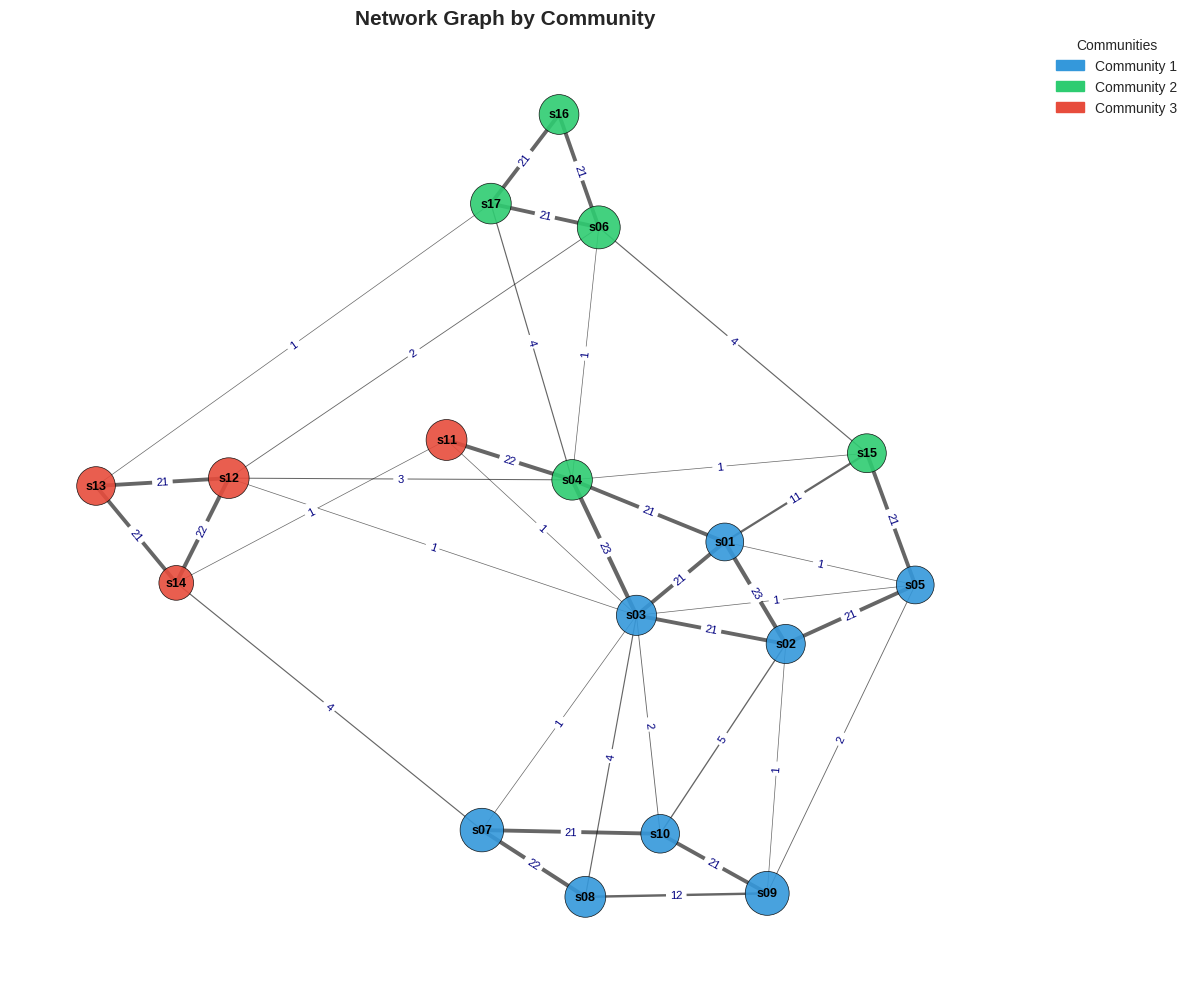

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import matplotlib
from networkx.algorithms import community
import numpy as np

# Safety check
if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    raise ValueError("Graph G is empty — please rebuild or load your nodes and edges first.")

# Detect communities
communities = community.greedy_modularity_communities(G)

# Map each node to its community index
node_to_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_community[node] = i

# Colors
custom_colors = ["#3498db", "#2ecc71", "#e74c3c"]  # blue, green, red
unique_communities = sorted(list(set(node_to_community.values())))
colors_list = [custom_colors[i % len(custom_colors)] for i in range(len(unique_communities))]
community_color_map = {idx: colors_list[idx] for idx in unique_communities}

# Node colors
node_colors = [community_color_map[node_to_community[node]] for node in G.nodes()]

# Scale node sizes by audience size (if available)
if all('audience_size' in G.nodes[node] for node in G.nodes()):
    raw_sizes = np.array([G.nodes[node]['audience_size'] for node in G.nodes()])
    node_sizes = 1000 * (np.log1p(raw_sizes) / np.log1p(raw_sizes.max()))
else:
    node_sizes = [800 for _ in G.nodes()]

# Edge width based on weight (scaled to keep ratios clean)
weights = np.array([G[u][v].get('weight', 1) for u, v in G.edges()])
if len(weights) > 0:
    min_w, max_w = weights.min(), weights.max()
    edge_widths = 0.5 + 2.5 * (weights - min_w) / (max_w - min_w + 1e-9)
else:
    edge_widths = [1 for _ in G.edges()]

edge_colors = ["black" for _ in G.edges()]

# Generate layout
pos = nx.spring_layout(G, k=0.4, iterations=100, seed=42)

# Create figure
plt.figure(figsize=(12, 10))
plt.style.use('seaborn-v0_8-darkgrid')

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=node_sizes,
    alpha=0.9,
    edgecolors='black',
    linewidths=0.5
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.6, width=edge_widths)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color='black')

# Edge weight labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='navy')

# Legend for communities
legend_handles = [
    mpatches.Patch(color=color, label=f'Community {comm_idx + 1}')
    for comm_idx, color in community_color_map.items()
]
plt.legend(
    handles=legend_handles,
    title="Communities",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Title and cleanup
plt.title('Network Graph by Community', fontsize=15, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

TASK:
Summarize the characteristics of the created network graph.

> The generated network graph reveals a distinct modular pattern composed of three main communities, represented by blue, green, and red nodes. The blue community serves as the most interconnected cluster, forming the network’s core where several nodes maintain multiple direct links. The green group bridges the blue and red communities, facilitating connections between them. Meanwhile, the red community is smaller and more localized, exhibiting limited links beyond its own members. Overall, the network demonstrates strong internal cohesion within each cluster and moderate inter-community connectivity, reflecting a structure that balances clustering and integration.




Additional: Network Graph Colored by Media Type

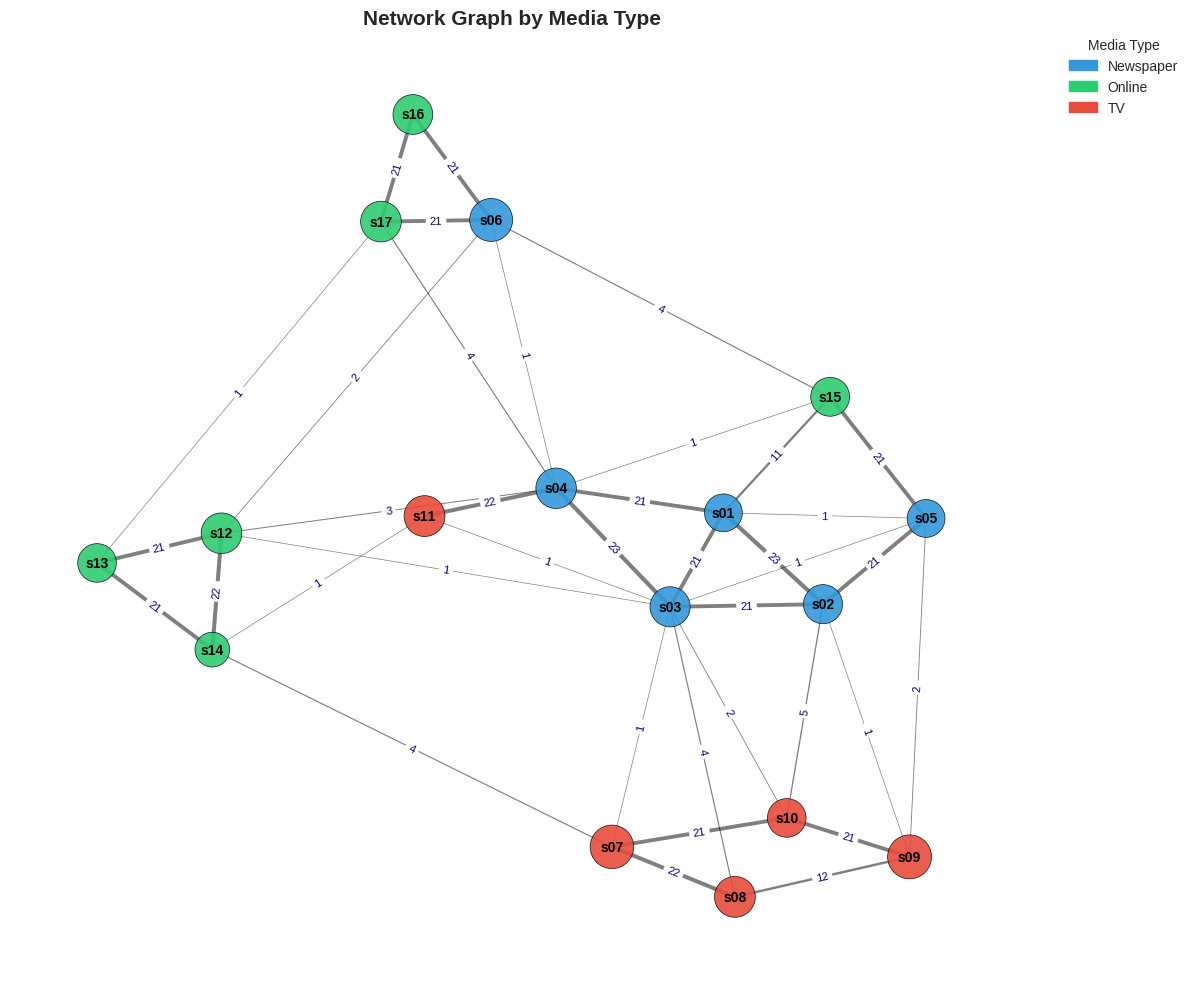

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import numpy as np

# Safety check
if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    raise ValueError("Graph G is empty — please rebuild or load your nodes and edges first.")

# Collect unique type labels
unique_type_labels = [G.nodes[node]['type_label'] for node in G.nodes() if 'type_label' in G.nodes[node]]
unique_type_labels = sorted(list(set(unique_type_labels)))

# Custom color map
custom_colors = ["#3498db", "#2ecc71", "#e74c3c"]  # blue, green, red
color_map = {label: custom_colors[i % len(custom_colors)] for i, label in enumerate(unique_type_labels)}

# Node colors by type_label
node_colors = [color_map.get(G.nodes[node].get('type_label', 'Unknown'), (0.7, 0.7, 0.7, 1)) for node in G.nodes()]

# Node sizes by audience_size (log-scaled)
raw_sizes = np.array([G.nodes[node].get('audience_size', 1) for node in G.nodes()])
size = 1000 * (np.log1p(raw_sizes) / np.log1p(raw_sizes.max()))

# Edge width based on weight (scaled but ratio preserved)
weights = np.array([G[u][v].get('weight', 1) for u, v in G.edges()])
if len(weights) > 0:
    min_w, max_w = weights.min(), weights.max()
    edge_widths = 0.5 + 2.5 * (weights - min_w) / (max_w - min_w + 1e-9)
else:
    edge_widths = [1 for _ in G.edges()]

# Layout
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Create plot
plt.figure(figsize=(12, 10))

# Draw nodes & edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=size, alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.5, width=edge_widths)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Edge weight labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='navy', label_pos=0.5)

# Legend for type labels
legend_handles = [mpatches.Patch(color=color_map[label], label=label) for label in unique_type_labels]
plt.legend(handles=legend_handles, title="Media Type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Title and cleanup
plt.title('Network Graph by Media Type', fontsize=15, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## Calculate Centrality Measures

### Subtask:
Calculate and print the degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality for each node in the graph `G`.


In [22]:
print("Rebuilding Graph G to ensure it's not null...")
G = nx.Graph()
for index, row in nodes.iterrows():
    node_id = row['id']
    G.add_node(node_id, media=row['media'], media_type=row['media.type'],
               type_label=row['type.label'], audience_size=row['audience.size'])

for index, row in edges.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight'], edge_type=row['type'])

print(f"Graph G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges after rebuilding.")

print("Calculating Centrality Measures...")

# 1. Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")
for node, centrality in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"Node {node}: {centrality:.4f}")

# 2. Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"Node {node}: {centrality:.4f}")

# 3. Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
print("\nCloseness Centrality:")
for node, centrality in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"Node {node}: {centrality:.4f}")

# 4. Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("\nEigenvector Centrality:")
for node, centrality in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True):
    print(f"Node {node}: {centrality:.4f}")


Rebuilding Graph G to ensure it's not null...
Graph G has 17 nodes and 38 edges after rebuilding.
Calculating Centrality Measures...

Degree Centrality:
Node s03: 0.5625
Node s04: 0.4375
Node s01: 0.3125
Node s02: 0.3125
Node s05: 0.3125
Node s06: 0.3125
Node s12: 0.3125
Node s07: 0.2500
Node s09: 0.2500
Node s10: 0.2500
Node s14: 0.2500
Node s15: 0.2500
Node s17: 0.2500
Node s08: 0.1875
Node s11: 0.1875
Node s13: 0.1875
Node s16: 0.1250

Betweenness Centrality:
Node s03: 0.3404
Node s04: 0.1957
Node s12: 0.1227
Node s06: 0.1002
Node s05: 0.0655
Node s15: 0.0562
Node s17: 0.0529
Node s07: 0.0503
Node s14: 0.0492
Node s01: 0.0391
Node s02: 0.0260
Node s10: 0.0258
Node s13: 0.0211
Node s08: 0.0196
Node s11: 0.0179
Node s09: 0.0174
Node s16: 0.0000

Closeness Centrality:
Node s03: 0.6667
Node s04: 0.6154
Node s12: 0.5714
Node s01: 0.5333
Node s05: 0.5161
Node s11: 0.5161
Node s06: 0.5000
Node s02: 0.4848
Node s07: 0.4848
Node s15: 0.4848
Node s10: 0.4706
Node s14: 0.4706
Node s08: 0.4571


TASK:
Determine the highly connected and most influential nodes.

> S03 clearly stands out as the main hub of the network, as reflected by its dominant centrality measures. Acting as the graph’s “center of gravity,” it achieves the highest degree, betweenness, closeness, and eigenvector centrality scores—showing that it not only maintains numerous direct links but also lies along key shortest paths and is closely integrated with other influential nodes. Following closely, S04 ranks second across most metrics, functioning as a strong secondary hub that reinforces the network’s connectivity. Although not as central as S03 and S04, nodes such as S01, S05, S06, and S12 also display relatively elevated centrality values, suggesting that they play a crucial role in supporting the core network and facilitating interactions across different parts of the system.



## Detect Communities

### Subtask:
Detect communities within the graph G and determine the number of communities found. Then, print the results.


In [23]:
from networkx.algorithms import community

print("Detecting communities using greedy_modularity_communities...")
communities = community.greedy_modularity_communities(G)

print("\nDetected Communities:")
for i, comm in enumerate(communities):
    print(f"Community {i+1}: {sorted(list(comm))}")

print(f"\nTotal number of communities found: {len(communities)}")

Detecting communities using greedy_modularity_communities...

Detected Communities:
Community 1: ['s01', 's02', 's03', 's05', 's07', 's08', 's09', 's10']
Community 2: ['s04', 's06', 's15', 's16', 's17']
Community 3: ['s11', 's12', 's13', 's14']

Total number of communities found: 3


TASK:
How many communities are detected? Describe.

> The network consists of three clearly defined communities, each serving a distinct function within the overall structure. Community 1, the largest cluster with eight nodes (s01, s02, s03, s05, s07, s08, s09, s10), represents the core of the network, characterized by dense internal links that indicate frequent interaction or shared associations among its members. Community 2, comprising five nodes (s04, s06, s15, s16, s17), functions as a bridge, connecting various sections of the network and facilitating communication between clusters. Community 3, the smallest group with four nodes (s11, s12, s13, s14), forms a tight-knit subgroup with strong internal connectivity, reflecting a specialized or focused set of relationships. Collectively, these communities demonstrate a balanced and well-structured network, where both central and peripheral clusters play integral roles in maintaining overall cohesion.

In [26]:
# Interactivity
import plotly.graph_objects as go
import networkx as nx
import numpy as np

# Layout
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Extract edges
edge_x, edge_y = [], []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='black'),
    hoverinfo='none',
    mode='lines'
)

# Node positions, labels, and sizes
node_x, node_y, text_labels, audience_sizes = [], [], [], []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    node_data = G.nodes[node]
    audience = node_data.get('audience_size', 0)
    audience_sizes.append(audience)

    label = (
        f"{node}<br>"
        f"Type: {node_data.get('type_label', 'N/A')}<br>"
        f"Audience: {audience}"
    )
    text_labels.append(label)

# Normalize audience sizes
audience_sizes = np.array(audience_sizes, dtype=float)
if len(audience_sizes) > 0:
    min_size, max_size = np.min(audience_sizes), np.max(audience_sizes)
    if max_size == min_size:
        marker_sizes = np.full_like(audience_sizes, 20)
    else:
        marker_sizes = 10 + 30 * (audience_sizes - min_size) / (max_size - min_size)
else:
    marker_sizes = np.full(len(G.nodes()), 15)

# --- Custom red, blue, green gradient ---
# Low-degree nodes = red → medium = blue → high = green
custom_colorscale = [
    [0.0, "#e74c3c"],   # red
    [0.5, "#3498db"],   # blue
    [1.0, "#2ecc71"]    # green
]

# Node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[n for n in G.nodes()],
    textposition="bottom center",
    hovertext=text_labels,
    hoverinfo="text",
    marker=dict(
        showscale=True,
        colorscale=custom_colorscale,
        color=[G.degree(n) for n in G.nodes()],
        size=marker_sizes,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(color='black', width=0.5)
    )
)

# Combine everything
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Interactive Network Graph',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[
            dict(
                text="Hover to view details",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002
            )
        ],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

fig.show()